In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
%matplotlib inline

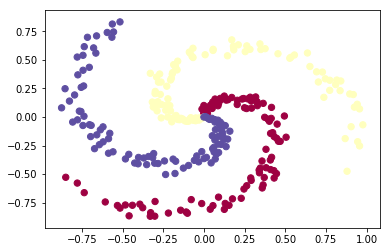

In [2]:
#Spiral Data
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

trainX = X
trainY = y

trainY = np.array(pd.get_dummies(trainY))

In [3]:
def graph(model):
    plt.figure()
    xx, yy = make_meshgrid(trainX[:, 0], trainX[:, 1])
    Z = np.c_[xx.ravel(), yy.ravel()]

    Z = model.predict(Z)
    Z = np.argmax(Z, axis=1)

    Z = Z.reshape(xx.shape)

    cp = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(trainX[:, 0], trainX[:, 1], c=np.argmax(trainY, axis=1), cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    

In [4]:
def  make_meshgrid (x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [61]:
from tensorflow.python.keras.layers import Input, Dense, Lambda, concatenate
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import backend as K
import tensorflow as tf

def attention(data):
    pred_concat = concatenate(data)
    weight = Dense(len(data), activation='softmax')(pred_concat)
        
    ensemble = None
    for i in range(weight.shape[1]):
        bag = tf.multiply(data[0], tf.reshape(weight[:, 0], [-1, 1]))

        if (ensemble is None):
            ensemble = bag
        else:
            ensemble = ensemble + bag
            
    return ensemble
        
inputs = Input(shape=(2,))

preds = []

for i in range(2):
    x = Dense(20, activation='relu')(inputs)
    pred = Dense(3, activation='softmax')(x)
    preds.append(pred)

predictions = Lambda(attention)(preds)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='mse')

#model.summary()

In [64]:
model.fit(trainX, trainY, epochs=200, batch_size=32)

Epoch 1/200
300/300 [==============================] - 0s 176us/step - loss: 0.0719
Epoch 2/200
300/300 [==============================] - 0s 157us/step - loss: 0.0718
Epoch 3/200
300/300 [==============================] - 0s 149us/step - loss: 0.0717
Epoch 4/200
300/300 [==============================] - 0s 160us/step - loss: 0.0716
Epoch 5/200
300/300 [==============================] - 0s 164us/step - loss: 0.0715
Epoch 6/200
300/300 [==============================] - 0s 156us/step - loss: 0.0714
Epoch 7/200
300/300 [==============================] - 0s 157us/step - loss: 0.0713
Epoch 8/200
300/300 [==============================] - 0s 153us/step - loss: 0.0713
Epoch 9/200
300/300 [==============================] - 0s 172us/step - loss: 0.0711
Epoch 10/200
300/300 [==============================] - 0s 168us/step - loss: 0.0711
Epoch 11/200
300/300 [==============================] - 0s 152us/step - loss: 0.0709
Epoch 12/200
300/300 [==============================] - 0s 157us/step - lo

300/300 [==============================] - 0s 152us/step - loss: 0.0652
Epoch 98/200
300/300 [==============================] - 0s 148us/step - loss: 0.0652
Epoch 99/200
300/300 [==============================] - 0s 140us/step - loss: 0.0651
Epoch 100/200
300/300 [==============================] - 0s 147us/step - loss: 0.0650
Epoch 101/200
300/300 [==============================] - 0s 139us/step - loss: 0.0650
Epoch 102/200
300/300 [==============================] - 0s 146us/step - loss: 0.0650
Epoch 103/200
300/300 [==============================] - 0s 147us/step - loss: 0.0648
Epoch 104/200
300/300 [==============================] - 0s 152us/step - loss: 0.0648
Epoch 105/200
300/300 [==============================] - 0s 152us/step - loss: 0.0648
Epoch 106/200
300/300 [==============================] - 0s 149us/step - loss: 0.0647
Epoch 107/200
300/300 [==============================] - 0s 151us/step - loss: 0.0647
Epoch 108/200
300/300 [==============================] - 0s 148us/step

300/300 [==============================] - 0s 155us/step - loss: 0.0614
Epoch 193/200
300/300 [==============================] - 0s 162us/step - loss: 0.0614
Epoch 194/200
300/300 [==============================] - 0s 142us/step - loss: 0.0614
Epoch 195/200
300/300 [==============================] - 0s 135us/step - loss: 0.0613
Epoch 196/200
300/300 [==============================] - 0s 153us/step - loss: 0.0613
Epoch 197/200
300/300 [==============================] - 0s 167us/step - loss: 0.0612
Epoch 198/200
300/300 [==============================] - 0s 157us/step - loss: 0.0612
Epoch 199/200
300/300 [==============================] - 0s 161us/step - loss: 0.0612
Epoch 200/200
300/300 [==============================] - 0s 159us/step - loss: 0.0612


In [50]:
#for i, x in enumerate(model.layers):
#    print (i, x)

model2 = Model(inputs=inputs, outputs=weight)
model2.compile(optimizer='rmsprop',
              loss='mse')

model2.predict(trainX)

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_24:0", shape=(?, 2), dtype=float32) at layer "input_24". The following previous layers were accessed without issue: []

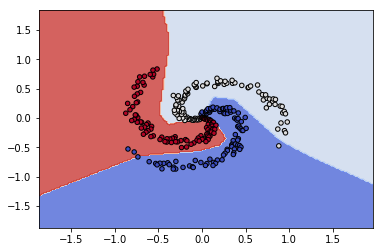

In [51]:
graph(model)